In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import Confusionfunc as cf

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
import pymssql
conn = pymssql.connect('ML-RefVm-981587\MSSQLSERVER2', 'symptom', 'root_2022', 'Symptomdatabase')  
cursor = conn.cursor(as_dict=True)

In [ ]:
lst = []
cursor.execute('SELECT * FROM stg.finaldataset;')
for row in cursor:
    lst.append(row)
    
df = pd.DataFrame(lst)

In [ ]:
df.head()

In [ ]:
from pycaret.classification import *
s = setup(df, target = 'Disease', session_id = 42)

In [ ]:
best = compare_models()

In [ ]:
model=create_model('lr')

In [ ]:
predict_model(model)

In [ ]:
pred=predict_model(model)

In [ ]:
#pred.to_csv("pedfile.csv")

In [ ]:
#pred2=pred.loc[:,:"prediction_label"]

In [ ]:
pred

In [ ]:
pred2=pred.iloc[:,36:]

In [ ]:
pred2.to_csv("trial.csv")

In [ ]:
Symp_prediction = pred2.Disease.unique().tolist()
Symp_prediction

In [ ]:
cm = confusion_matrix(pred2.Disease, pred2.prediction_label, labels=Symp_prediction)
cm

In [ ]:
plt.figure(figsize=(20,18))
sns.heatmap(data=cm, annot=True, xticklabels=Symp_prediction, yticklabels=Symp_prediction, 
                     cbar=False, linewidths=.6, cmap=['purple', 'yellow'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Actual',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Disease Predictor/Confusion Matrix',fontsize=40)
plt.show()

In [ ]:
cf.sns_cm()

In [4]:
pred2=pd.read_csv('./trial.csv')
pred2.head()

,Unnamed: 0,Disease,prediction_label,prediction_score
0,3306,Hyperthyroidism,Hyperthyroidism,0.9946
1,3000,Common Cold,Common Cold,0.9992
2,1806,Hepatitis D,Hepatitis D,0.9981
3,2664,Tuberculosis,Tuberculosis,0.9997
4,4446,Impetigo,Impetigo,0.9916


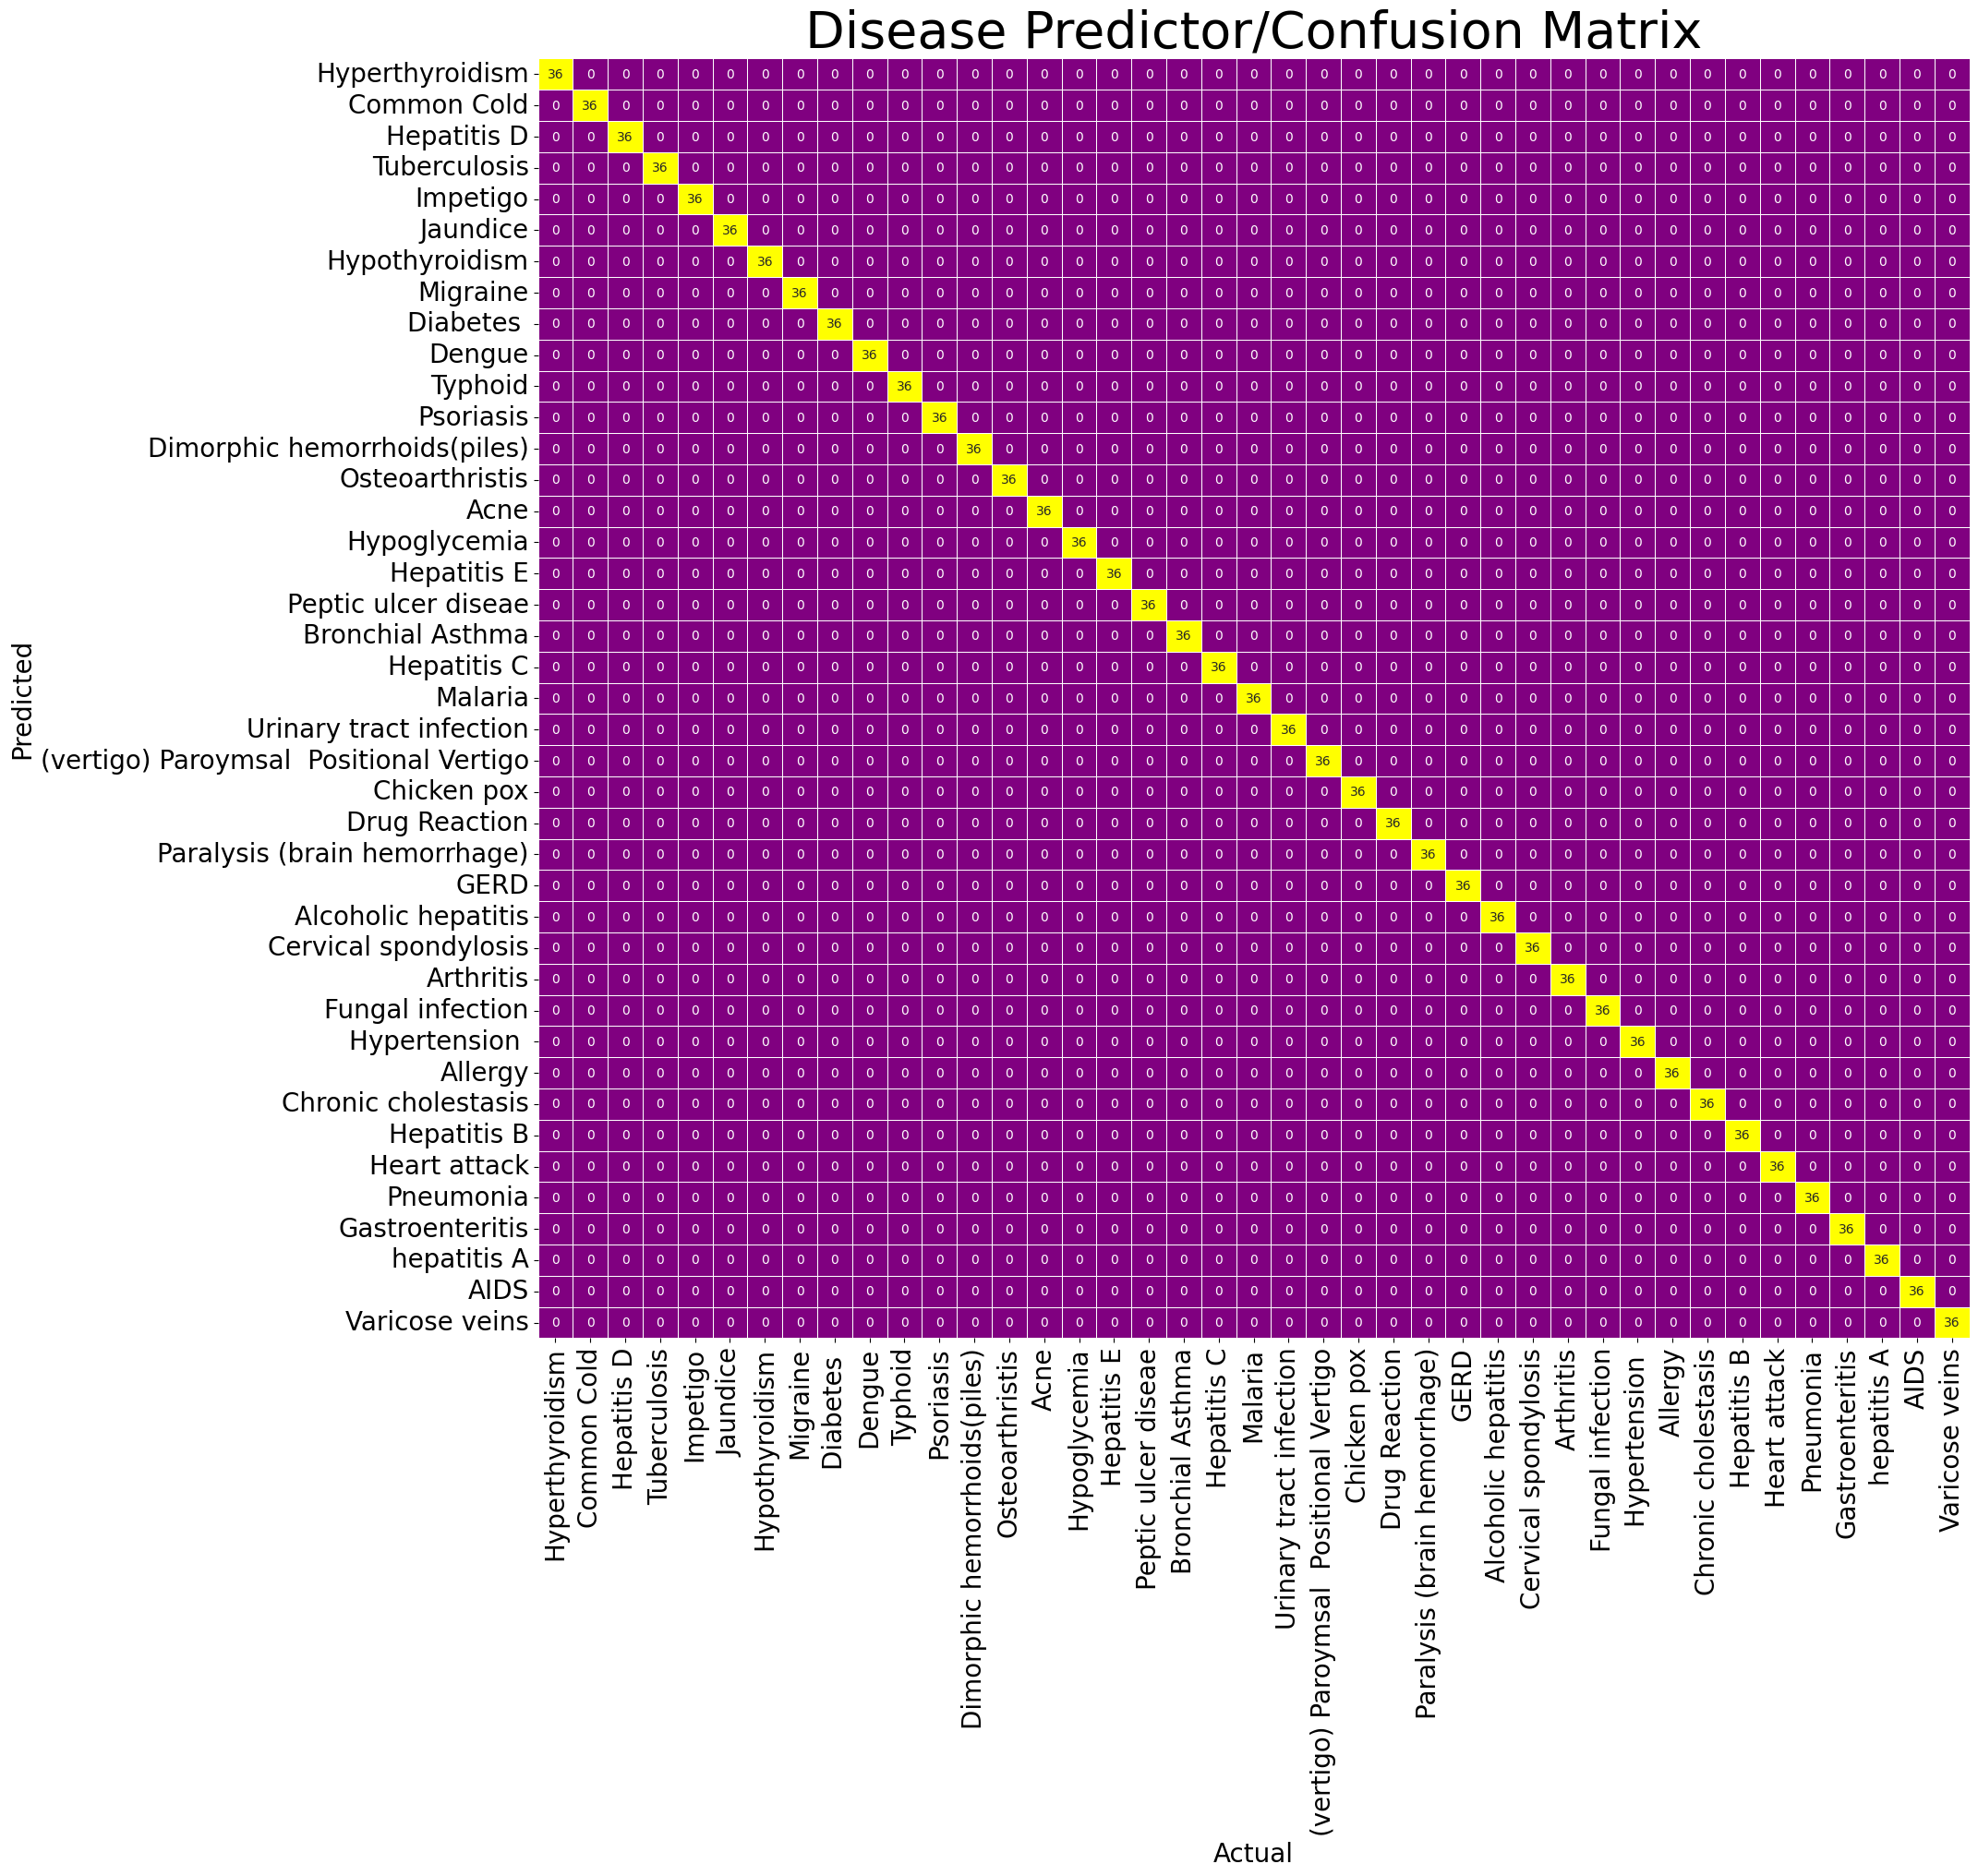

In [5]:
cf.sns_cm(pred2.Disease,pred2.prediction_label)
